In [44]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [45]:
def plot(axes, x, y, title, label=None, semilog=False):
    f = axes.semilogy if semilog else axes.plot
    f(x, y, linestyle='', marker='.', markersize=6, label=label)
    axes.set_title(title)
    # axes.set_ylabel(title)
    axes.set_xlabel('kT')


In [46]:
from importlib import reload
try:
    reload(recopilar_data)
except NameError:
    import recopilar_data
    
# data = pd.read_csv('alldata.dat', sep='\s+')
data_raw = pd.read_csv('alldata.dat', sep='\s+')
data_raw['amag'] = abs(data_raw['magnetization'])

data_raw.head(10)

,size,B,temperature,job,energy,energy^2,magnetization,magnetization^2,aceptados,amag,N
0,40,0.0,2.94,2,-1347.663468,1.822371e+06,-14.225848,22428.021753,0.448086,14.225848,1600
1,40,0.0,2.94,10,-1345.506078,1.816166e+06,0.535509,20068.779271,0.448709,0.535509,1600
2,40,0.0,2.94,9,-1348.083173,1.822863e+06,13.943058,19230.048624,0.448198,13.943058,1600
3,40,0.0,2.94,3,-1348.307102,1.823760e+06,18.236724,21631.483045,0.447750,18.236724,1600
4,40,0.0,2.94,7,-1354.497761,1.840730e+06,30.110685,24728.574536,0.446440,30.110685,1600
5,40,0.0,2.94,5,-1346.484965,1.819129e+06,-11.435701,18780.967370,0.448179,11.435701,1600
6,40,0.0,2.94,4,-1346.314779,1.818169e+06,5.663468,20002.812540,0.448745,5.663468,1600
7,40,0.0,2.94,1,-1348.222649,1.823506e+06,9.527191,19661.953935,0.447648,9.527191,1600
8,40,0.0,2.94,8,-1350.904671,1.831084e+06,19.901472,23388.127959,0.447162,19.901472,1600
9,40,0.0,2.94,6,-1347.570058,1.821839e+06,-10.078695,24339.985925,0.448234,10.078695,1600


<AxesSubplot:>

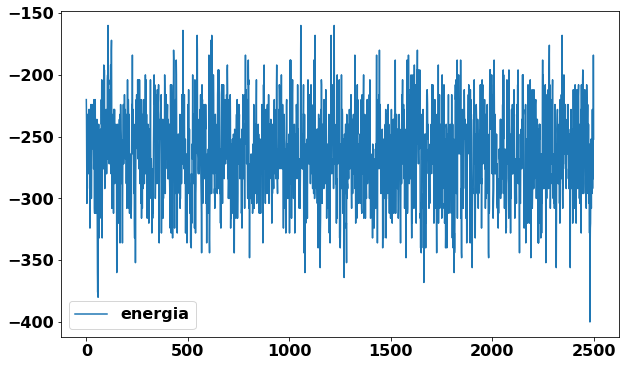

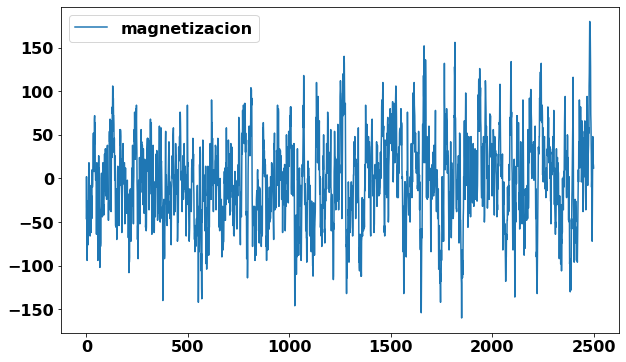

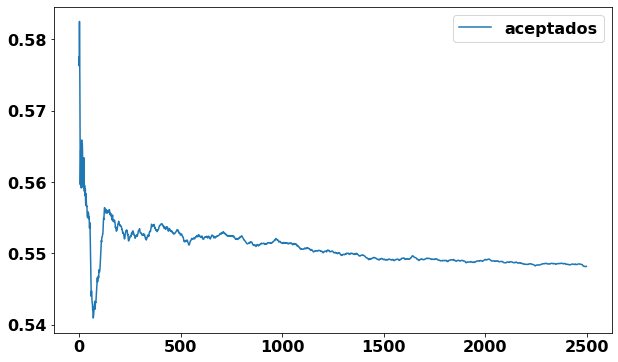

In [47]:
size = 20
temperature = 3.5
job = 1
output_file = f'{size}_size/{temperature:.3}_temp/{job:02}_JOB/output.dat'

run_data = pd.read_csv(output_file, sep='\s+' , names=['energia', 'magnetizacion', 'aceptados'])
run_data.head()

run_data.plot(y=['energia'], figsize=(10, 6))
run_data.plot(y=['magnetizacion'], figsize=(10, 6))
run_data.plot(y=['aceptados'], figsize=(10, 6))

<AxesSubplot:xlabel='temperature'>

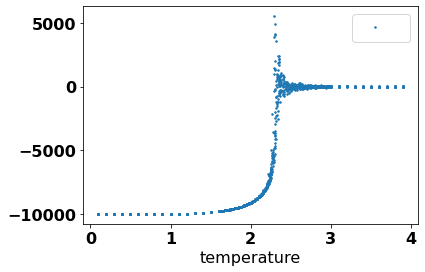

In [48]:
df = data_raw[data_raw['size'] == 100]
df.plot(x='temperature', y='magnetization', linestyle='',marker='.', markersize=3, label='')

In [60]:
data = data_raw.groupby(['size','temperature', 'B']).agg(
    {'energy':['mean', 'var'],
    'energy^2':['mean', 'var'],
    'magnetization':['mean', 'var'],
    'magnetization^2':['mean', 'var'],
    'amag':['mean', 'var'],
    'aceptados':'mean',}
).reset_index()#.drop('job', axis=1)
data['N'] = data['size']**2

data.loc[120:130]


size temperature    B      energy                 energy^2                \
                                 mean       var           mean           var   
100   10         3.1  0.0  -78.563224  0.154640    6541.318828   4379.126518   
101   10         3.2  0.0  -74.676692  0.170801    5922.117548   3938.681175   
102   10         3.3  0.0  -71.779222  0.173194    5485.605679   3501.884971   
103   10         3.4  0.0  -68.562184  0.121348    5014.624298   2830.912555   
104   10         3.5  0.0  -66.178822  0.117813    4688.718008   2133.473026   
105   10         3.6  0.0  -63.737826  0.055270    4363.385901    831.734951   
106   10         3.7  0.0  -61.376462  0.066618    4059.763144   1184.311215   
107   10         3.8  0.0  -59.354745  0.040555    3804.372683    728.485862   
108   10         3.9  0.0  -57.495970  0.084175    3585.650555   1485.940080   
109   20         0.1  0.0 -800.000000  0.000000  640000.000000      0.000000   
110   20         0.2  0.0 -800.000000  0.000000  640000.000000      0.000000   
111   20         0.3  0.0 -800.000000  0.000000  640000.000000      0.000000   
112   20         0.4  0.0 -800.000000  0.000000  640000.000000      0.000000   
113   20         0.5  0.0 -800.000000  0.000000  640000.000000      0.000000   
114   20         0.6  0.0 -799.995202  0.000019  639992.361455     47.542296   
115   20         0.7  0.0 -799.964814  0.000202  639943.984006    512.880527   
116   20         0.8  0.0 -799.849980  0.000799  639761.192483   2024.580110   
117   20         0.9  0.0 -799.533946  0.001724  639258.347221   4368.142105   
118   20         1.0  0.0 -798.856937  0.004653  638181.767293  11794.811095   
119   20         1.1  0.0 -797.650380  0.009672  636265.654378  24464.990482   
120   20         1.2  0.0 -795.404718  0.008634  632707.553139  21832.839600   

    magnetization           magnetization^2                    amag            \
             mean       var            mean         var        mean       var   
100     -0.097610  1.682930      969.221198  639.008963    1.024398  0.527527   
101      0.384242  0.657421      837.981082  464.939286    0.696370  0.282655   
102     -0.441396  0.738523      752.503390  720.212113    0.795440  0.251973   
103     -0.266873  0.535062      665.185841  593.147275    0.626757  0.177725   
104     -0.077732  0.354745      612.292571  222.958164    0.473213  0.112647   
105     -0.097870  0.958072      560.381082  132.230115    0.767403  0.314373   
106      0.089371  0.628260      513.310869   44.840486    0.643716  0.176724   
107      0.004520  0.579025      478.809879  175.697964    0.625377  0.144496   
108     -0.046655  0.744582      451.536966  181.800603    0.706869  0.191819   
109   -400.000000  0.000000   160000.000000    0.000000  400.000000  0.000000   
110   -400.000000  0.000000   160000.000000    0.000000  400.000000  0.000000   
111   -400.000000  0.000000   160000.000000    0.000000  400.000000  0.000000   
112   -400.000000  0.000000   160000.000000    0.000000  400.000000  0.000000   
113   -400.000000  0.000000   160000.000000    0.000000  400.000000  0.000000   
114   -399.998800  0.000001   159999.042783    0.746586  399.998800  0.000001   
115   -399.991204  0.000013   159992.980408    8.054079  399.991204  0.000013   
116   -399.962015  0.000048   159969.692283   30.712566  399.962015  0.000048   
117   -399.882367  0.000114   159906.153858   72.754080  399.882367  0.000114   
118   -399.709636  0.000307   159768.410236  195.223498  399.709636  0.000307   
119   -399.394962  0.000502   159517.695322  320.081827  399.394962  0.000502   
120   -398.802559  0.000576   159046.310436  365.318209  398.802559  0.000576   

    aceptados    N  
         mean       
100  0.478377  100  
101  0.499019  100  
102  0.515682  100  
103  0.532933  100  
104  0.546781  100  
105  0.561394  100  
106  0.574711  100  
107  0.587187  100  
108  0.598463  100  
109  0.000000  400  
110  0.000000  400  
111  0.000000  400  
112  

In [61]:
data['Cv'] = (data['energy^2', 'mean']-data['energy', 'mean']**2)/(data['temperature']**2)*data['N']
data['X'] = (data['magnetization^2', 'mean']-data['amag', 'mean']**2)*data['N']/data['temperature']
data['E'] = data['energy', 'mean'] / data['N']
data['M'] = data['amag', 'mean'] / data['N']


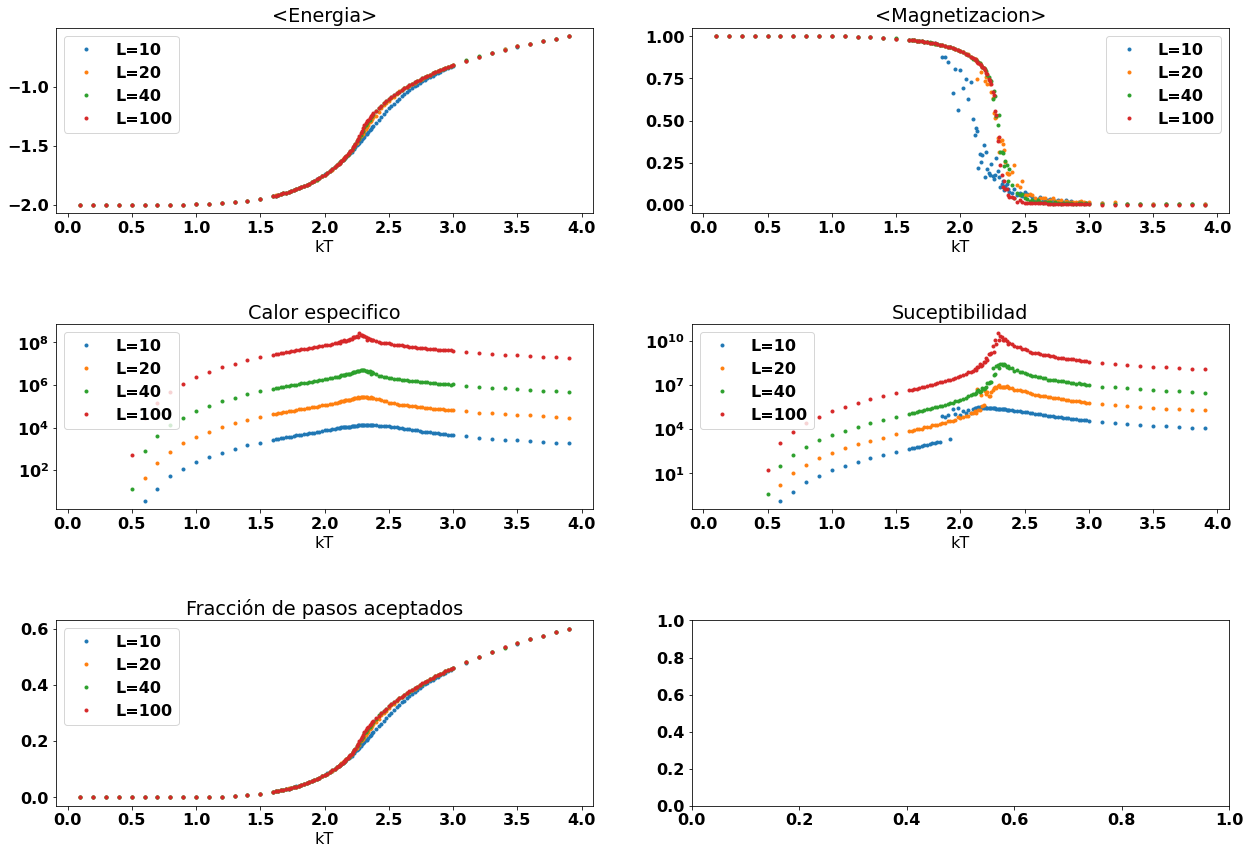

In [62]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2)
fig.set_size_inches(18.5, 13)
for s in data['size'].unique():
    dataf = data[(data['size']==s) & (data['B']==0.0)]
    
    plot(ax2, dataf['temperature'], dataf['M'], '<Magnetizacion>', label=f'L={s}')
    plot(ax1, dataf['temperature'], dataf['E'], '<Energia>', label=f'L={s}')
    plot(ax3, dataf['temperature'], dataf['Cv'], 'Calor especifico', label=f'L={s}', semilog=True)
    plot(ax4, dataf['temperature'], dataf['X'], 'Suceptibilidad', label=f'L={s}', semilog=True)
    plot(ax5, dataf['temperature'], dataf['aceptados'], 'Fracción de pasos aceptados', label=f'L={s}')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
fig.tight_layout(pad=3.0)
plt.show()